In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import pylab as pl


%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jonathan\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:

#Usual packages for import

from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
from scipy.cluster.hierarchy import dendrogram, linkage
#import sklearn.clusterEC
from scipy.cluster.vq import whiten

from scipy import cluster
#from geopy.distance import great_circle
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster as scp

from scipy.spatial.distance import cdist, pdist

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2


# url handlers

import ast
import urllib.request
from io import StringIO
import os
import zipfile

try:
    #Packages for Python 3
    from urllib.parse import urlencode
    from urllib.request import urlopen
    from urllib.error import HTTPError
    
except ImportError:
    #Packages for Python 2
    from urllib import urlencode
    from urllib2 import urlopen, HTTPError
    
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

#from geopy.geocoders import Nominatim
#import geopandas as gp

import scipy.stats
import seaborn as sns
import statsmodels.api as sm
plt.style.use('seaborn')

%pylab inline

## additional imports (although I'm not sure I ended up using them)
#import choroplethNYC as cp
#import categoricalcolorbar as ccb

C:\Users\Jonathan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('../01 Data/schma19962016.csv')
df.head()

C:\Users\Jonathan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (124,125,126,148,149,150,183,220,221,222,226,227,230,231,232,234,235,247) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DBN,SCHNAM,YEAR,SCHLEV,SCHLEV5,SCHS219962016,XDBN,XDBN_FLAG,ENRNUMPRK,ENRNUMKID,...,BNLONG_YRFIRST,BNLONG_YRLAST,BNLONG_TOTALYRS,BNLONG_PHASEDOUT19962016,BNLONG_PHASEDIN19962016,BNLONG_CONTOPERATE19962016,CBO,HSJHS,HSSCHSAMP2,SPECHS
0,00M801,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M801,0,16,48,...,1996,1998,3.0,1,0,0,0,NaN,6,0
1,00M802,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M802,0,0,0,...,1996,1998,3.0,1,0,0,0,1.0,6,0
2,00M803,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M803,0,0,0,...,1996,1998,3.0,1,0,0,0,0.0,6,0
3,01M015,ROBERTO CLEMENTE,1996,NaN,NaN,NaN,01M015,0,0,36,...,1996,2016,21.0,0,0,0,0,NaN,6,0
4,01M019,ASHER LEVY,1996,NaN,NaN,NaN,01M019,0,33,82,...,1996,2016,21.0,0,0,0,0,NaN,6,0


In [4]:
df.shape

(30345, 270)

In [5]:
df['BNLONG_CONTOPERATE19962016'].value_counts(dropna=False)

0    30345
Name: BNLONG_CONTOPERATE19962016, dtype: int64

In [6]:
#highest year for BN number -- when a school was closed?
df['BNLONG_YRLAST'].value_counts(dropna=False)

2016    26658
2015      965
2014      436
2007      255
2011      239
2006      230
2010      195
2009      169
2005      167
2008      160
2004      150
2012      130
2002      124
2001      115
2013      114
2003       94
2000       51
1998       35
1999       32
1997       18
1996        8
Name: BNLONG_YRLAST, dtype: int64

Which schools have closed down?

Renewal schools:
PS 050 Vito Marcantonio (04M050) 2017
Coalition School for Social Change (04M409) 2017
High School for Health Careers and Sciences (06M468) 2017
New Explorers High School (07X547) 2017
Urban Science Academy (09X325) 2017
PS 92 Bronx School (12X092) 2017
Brooklyn Collegiate: A College Board School (23K493) 2017
PS/MS 42 R. Vernam (27Q042) 2017
MS 53 Brian Piccolo (27Q053) 2017
Holcombe L. Rucker School of Community (08X332) 2017
Entrada Academy (12X384)
Middle School of Marketing and Legal Studies (18K598)
Gregory Jocko Jackson School (23K284) (just middle school years)
P.S. 306 Ethan Allen and P.S. 165 Ida Posner. (truncating middle schools)
Paul Robeson High School 


Hard to find out which are schools that have been shut down!

Features notes
- academic expectations (average, and compared to city and peer horizon scores) - could be a good measure of school performance? (comparing expectation to peer horizon)
- attendance -- have some grades reporting over 100% attendnace?



In [7]:
df[df.HSSCHSAMP2 == 4]

,DBN,SCHNAM,YEAR,SCHLEV,SCHLEV5,SCHS219962016,XDBN,XDBN_FLAG,ENRNUMPRK,ENRNUMKID,...,BNLONG_YRFIRST,BNLONG_YRLAST,BNLONG_TOTALYRS,BNLONG_PHASEDOUT19962016,BNLONG_PHASEDIN19962016,BNLONG_CONTOPERATE19962016,CBO,HSJHS,HSSCHSAMP2,SPECHS
1108,79K409,EAST NEW YORK FAMILY ACADEMY,1996,NaN,NaN,NaN,79K409,0,0,0,...,1996,2015,NaN,1,0,0,0,0.0,4,0
1109,79K510,AUX SERVICES (BROOKLYN),1996,NaN,NaN,NaN,79K510,0,0,0,...,1996,2015,NaN,1,0,0,0,NaN,4,0
1110,79K511,BEDFORD STUYVESANT OUTREACH,1996,NaN,NaN,NaN,79K511,0,0,0,...,1996,2003,8.0,1,0,0,0,0.0,4,0
1111,79K512,BUSHWICK OUTREACH,1996,NaN,NaN,NaN,79K512,0,0,0,...,1996,2004,9.0,1,0,0,0,0.0,4,0
1112,79K565,HIGH SCHOOL REDIRECTION,1996,NaN,NaN,NaN,79K565,0,0,0,...,1996,2004,9.0,1,0,0,0,0.0,4,0
1113,79K573,BROOKLYN BOROUGH ACADEMY,1996,NaN,NaN,NaN,79K573,0,0,0,...,1996,2003,8.0,1,0,0,0,0.0,4,0
1114,79K580,BROOKLYN LITERACY CENTER,1996,NaN,NaN,NaN,79K580,0,0,0,...,1996,2003,8.0,1,0,0,0,0.0,4,0
1115,79K591,BROOKLYN OFF-SITE ED SERVICES,1996,NaN,NaN,NaN,79K591,0,0,0,...,1996,2005,10.0,1,0,0,0,0.0,4,0
1116,79K665,NYC VOCATIONAL TRAINING CENTER,1996,NaN,NaN,NaN,79K665,0,0,0,...,1996,2007,12.0,1,0,0,0,0.0,4,0
1117,79K931,TEEN AID HIGH SCHOOL,1996,NaN,NaN,NaN,79K931,0,0,0,...,1996,2002,7.0,1,0,0,0,0.0,4,0


In [8]:
df.LCGSTAT.value_counts(dropna=False)

OPEN      19689
NaN       10632
CLOSED       24
Name: LCGSTAT, dtype: int64

# Feature engineering

In [9]:
df_feats = pd.read_csv('../01 Data/schma features of interest.csv')
df_feats.head()

,Feat_Code,Feat_expl,Notes
0,ATTPCTG01,School attendnace,NaN
1,ATTPCTG02,School attendnace,NaN
2,ATTPCTG03,School attendnace,NaN
3,ATTPCTG04,School attendnace,NaN
4,ATTPCTG05,School attendnace,NaN


In [10]:
codes = df_feats.Feat_Code

In [11]:
keep = df.columns[df.columns.isin(codes)]

In [12]:
keep = list(keep)

In [13]:
for x in ['DBN','SCHNAM','YEAR','BNLONG']:
    keep.append(x)

In [14]:
df.shape

(30345, 270)

In [15]:
df[keep].shape

(30345, 146)

In [16]:
#keeping only the features of interest
df = df[keep]

In [17]:
df_feats.sort_values(by='Notes').head(20)

,Feat_Code,Feat_expl,Notes
16,CCDENRNUMFRL,CCD: NUMBER STUDENTS ELIGIBLE FOR THE FREE OR ...,*need to normalize
17,CCDNUMFTE,CCD: CLASSROOM TEACHERS (FTE),*normalize by no stu
100,LCGSTAT,open close status,24 noted as closed
89,HPGPERDIP4AVG,HS PROG RPT: 4-YEAR DIPLOMA RATE (AVERAGE),CAN BE AN OUTCOME
88,HPGGENREGREMAVG,HS PROG RPT: COMPLETION RATE FOR REMAINING REG...,CAN BE AN OUTCOME
87,HPGGEN10CYR3AVG,HS PROG RPT: % 3RD YEAR GEN STUDENTS EARNING 1...,CAN BE AN OUTCOME
90,HPGPERDIP6AVG,HS PROG RPT: 6-YEAR RATE DIPLOMA (AVERAGE),CAN BE AN OUTCOME
85,HPGGEN10CYR1AVG,HS PROG RPT: % 1ST YEAR GEN STUDENTS EARNING 1...,CAN BE AN OUTCOME
84,HPGG08PROF,HS PROG RPT: AVERAGE 8TH GRADE PROFICIENCY,CAN BE AN OUTCOME
86,HPGGEN10CYR2AVG,HS PROG RPT: % 2ND YEAR GEN STUDENTS EARNING 1...,CAN BE AN OUTCOME


In [18]:
df['CCDNUMFTE_normd'] = (df['CCDNUMFTE'] / df['ENRNUMTOT'])

In [19]:
df['CCDENRNUMFRL_normd'] = (df['CCDENRNUMFRL'] / df['ENRNUMTOT'])

In [20]:
df['LCGSCHTYP'].value_counts(dropna=False).index

Index([ 'GENERAL ACADEMIC',                 nan,                 'S',
       'SPECIAL EDUCATION',   'TRANSFER SCHOOL',       'ALTERNATIVE',
        'CAREER TECHNICAL',       'HOME SCHOOL',              'YABC',
       'SUSPENSION CENTER',                 'P',                'FC',
          'NOT APPLICABLE',       'BUDGET ONLY',                 'I',
                   'ADULT'],
      dtype='object')

YABC = young adult burrough center\

In [21]:
len(df[df['LCGSCHTYP'].isin(['HOME SCHOOL','YABC',
       'SUSPENSION CENTER', 'FC',  'P',
             'BUDGET ONLY', 'NOT APPLICABLE','I',
                   'ADULT'])])

78

In [22]:
#dropping alt school types
df = df[~df['LCGSCHTYP'].isin(['HOME SCHOOL','YABC',
       'SUSPENSION CENTER', 'FC',  'P',
             'BUDGET ONLY', 'NOT APPLICABLE','I',
                   'ADULT'])]

In [23]:
df.shape

(30267, 148)

In [24]:
df.isnull().sum(axis=1).sort_values(ascending=False)

3864     124
4408     124
4334     124
4300     124
4246     124
4211     124
4175     124
4140     124
4104     124
4082     124
4045     124
4029     124
3996     124
3963     124
3932     124
3900     124
3809     124
3770     124
3737     124
3709     124
3679     124
3658     124
3630     124
3602     124
3534     124
4364     124
4265     124
4441     124
4508     124
4567     124
        ... 
14362     31
15770     31
16561     31
15878     31
16110     31
15877     31
16410     31
16717     31
11056     28
25332     28
16379     26
12523     25
26895     25
14021     24
23675     23
17932     22
11399     20
18796     19
18649     19
25195     19
22039     17
20408     17
23535     17
20259     17
21895     17
17213     17
15526     16
17069     15
14161     14
15673     14
Length: 30267, dtype: int64

In [25]:
#check nans
df.isnull().sum().sort_values(ascending=False)

CLSAVGG12          30108
CLSNUMG12          30097
HSOPCTHSGTOT       28923
HSOPCTSENTOT       28923
HSOPCTDRPTOT       28923
HSOPCTDCHTOT       28885
HPGPERDIP6AVG      28331
HPGG08PROF         28307
HPGPERDIP4AVG      27928
HPGGENREGREMAVG    27804
HPGGEN10CYR3AVG    27795
HPGGEN10CYR2AVG    27708
HPGGEN10CYR1AVG    27638
ENRNUMELL          26998
ENRNUMPOV          26998
ENRNUMOTH          26998
HSOPCTDRPNYC       26033
HSOPCTSENNYC       26033
HSOPCTHSGNYC       26033
CLSAVGGEN          25824
CLSAVGG11          24218
CLSNUMG11          24217
ATTPCTG12          24104
CLSNUMG10          23885
CLSAVGG10          23885
ATTPCTG11          23745
STCELAPCTL34G07    23376
CLSAVGG09          23364
STCMTHPCTL34G08    23363
CLSNUMG09          23362
                   ...  
SCHLOGRD            2349
ATTPCTTOT           1844
CLSAVGTOT           1026
CLSNUMTOT           1026
SCHGRDCONFIG         955
SCHNAM               688
BNLONG               636
ENRNUMG08              0
ENRNUMPRK              0


# Question: predicting school closures

In [26]:
df['LCGSTAT'].value_counts(dropna=False)

OPEN      19619
NaN       10624
CLOSED       24
Name: LCGSTAT, dtype: int64

In [27]:
df[df['LCGSTAT'] == 'CLOSED']

,SCHLEV,SCHLEV5,ENRNUMPRK,ENRNUMKID,ENRNUMG01,ENRNUMG02,ENRNUMG03,ENRNUMG04,ENRNUMG05,ENRNUMG06,...,DMGPCTELLTOT,CTMSCH,CBO,SPECHS,DBN,SCHNAM,YEAR,BNLONG,CCDNUMFTE_normd,CCDENRNUMFRL_normd
9872,2.0,2.0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2004,M450,0.160377,NaN
9873,2.0,2.0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M509,CMSP CHANCELLOR'S MODEL SCHOOL,2004,NaN,0.178417,NaN
9875,1.0,1.0,0,85,63,59,0,0,0,47,...,NaN,0,0,0,01M539,NEST+M,2004,M539,0.147239,NaN
10017,1.0,1.0,6,13,17,45,39,49,47,44,...,NaN,0,0,0,04M109,HOSTOS ACADEMY AT JHS99M,2004,M109,0.030508,NaN
10052,2.0,2.0,0,0,0,0,0,35,54,56,...,NaN,0,0,0,05M469,CHOIR ACADEMY OF HARLEM,2004,M469,0.108614,NaN
10073,1.0,1.0,0,105,94,94,100,97,71,37,...,NaN,0,0,0,06M176,W. HAYWOOD BURNS SCHOOL #176,2004,M176,0.035397,NaN
10101,2.0,2.0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,07X149,ELIJAH D. CLARK - JHS # 149,2004,X149,0.103067,NaN
10131,1.0,1.0,0,102,128,113,116,132,105,0,...,NaN,0,0,0,08X060,GEORGE L. GALLEGO SCHOOL,2004,X060,NaN,NaN
10251,1.0,1.0,0,192,100,0,0,0,0,0,...,NaN,0,0,0,10X257,THE CHILDREN'S SCHOOL,2004,X257,0.080906,NaN
10454,2.0,2.0,0,0,0,0,0,0,0,110,...,NaN,0,0,0,15K142,STRANAHAN IS (RENAMED 378),2004,K142,0.018248,NaN


In [28]:
df[df['BNLONG'] == 'M450']

,SCHLEV,SCHLEV5,ENRNUMPRK,ENRNUMKID,ENRNUMG01,ENRNUMG02,ENRNUMG03,ENRNUMG04,ENRNUMG05,ENRNUMG06,...,DMGPCTELLTOT,CTMSCH,CBO,SPECHS,DBN,SCHNAM,YEAR,BNLONG,CCDNUMFTE_normd,CCDENRNUMFRL_normd
21,NaN,NaN,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,1996,M450,NaN,NaN
1175,NaN,NaN,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,1997,M450,NaN,NaN
2346,NaN,NaN,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,1998,M450,NaN,NaN
3530,NaN,NaN,0,0,0,0,0,0,0,0,...,NaN,1,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,1999,M450,NaN,NaN
4752,2.0,2.0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2000,M450,NaN,NaN
6018,2.0,2.0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2001,M450,NaN,NaN
7290,2.0,2.0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2002,M450,NaN,NaN
8568,2.0,2.0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2003,M450,NaN,NaN
9872,2.0,2.0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2004,M450,0.160377,NaN
11228,2.0,2.0,0,0,0,0,0,0,0,0,...,NaN,1,0,0,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2005,M450,0.066798,0.000000


In [29]:
dff = pd.melt(df, id_vars=['BNLONG', 'YEAR'])#.pivot(index='BNLONG', columns='YEAR')

In [30]:
dff.head()

,BNLONG,YEAR,variable,value
0,M801,1996,SCHLEV,NaN
1,M802,1996,SCHLEV,NaN
2,M803,1996,SCHLEV,NaN
3,M015,1996,SCHLEV,NaN
4,M019,1996,SCHLEV,NaN


In [31]:
f1 = dff.groupby(["BNLONG",'variable', "YEAR"])['value'].aggregate(lambda x: x).unstack().reset_index()
f1.columns=f1.columns.tolist()

In [32]:
f1.shape

(291416, 23)

In [33]:
f1 = f1[~(f1.isnull().sum(axis=1) >= 21)]

In [34]:
f1

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,K001,ATTPCTG01,88.76,92.53,90.76,91.04,91.62,91.57,91.88,92.76,...,93.98,93.56,94.45,93.49,93,94.86,94.81,93.87,95.12,95.62
1,K001,ATTPCTG02,91.33,91.37,92.66,92,92.26,93.87,92.71,93.02,...,93.16,94.99,94.87,95.46,93.83,94.68,94.86,95.12,95.38,95.55
2,K001,ATTPCTG03,92.43,93.11,92.36,93.55,92.9,92.77,94.14,93.56,...,94.57,94.37,95.75,95.55,95.14,95.57,95.35,95.26,95.74,96.32
3,K001,ATTPCTG04,92.36,93.75,92.44,91.88,93.99,93.17,92.38,94.3,...,94,94.81,93.66,95.5,95.65,96.35,95.85,95.16,95.67,96.5
4,K001,ATTPCTG05,93.04,92.92,92.61,93.2,92.07,94.12,93.25,93.45,...,94.02,94.43,95.38,94.12,95.74,95.81,96.4,94.99,95.64,95.79
12,K001,ATTPCTKID,89.73,90.98,89.44,89.96,90.36,90.46,89.16,92.66,...,92.31,93.87,92.95,92.44,93.14,94.34,93.55,93.67,94.51,93.65
13,K001,ATTPCTPRK,79.9,86.19,87.09,84.75,85.54,81.24,86.81,89.33,...,88.92,90.42,89.73,91.65,89.24,92.8,91.95,91.58,90.89,93.79
14,K001,ATTPCTTOT,90.36,91.97,91.28,91.39,91.57,91.65,91.88,92.78,...,92.94,93.68,93.82,94.06,93.68,94.9,94.67,94.25,94.84,95.32
15,K001,CBO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,K001,CLSAVGG01,25.5385,30,27,30.1429,24.8,18.6364,21.3,19.1111,...,20.8,20.1333,22.6667,19.2941,21.4667,26,34.3077,34.3077,24,25.1429


## Let's explore enrolment of Black students

In [35]:
tsBlackEnrolment = f1[f1['variable']=='ENRNUMAFM']

In [36]:
tsBlackEnrolment.head()

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
59,K001,ENRNUMAFM,NaN,NaN,NaN,NaN,45,33,30,28,...,29,20,18,16,27,22,18,19,12,10
205,K002,ENRNUMAFM,NaN,NaN,NaN,NaN,917,919,989,1162,...,537,441,369,332,341,373,397,406,391,384
351,K003,ENRNUMAFM,NaN,NaN,NaN,NaN,861,842,752,674,...,542,517,495,527,503,483,430,388,358,306
497,K004,ENRNUMAFM,NaN,NaN,NaN,NaN,153,171,166,175,...,212,193,212,224,224,223,223,221,212,215
643,K005,ENRNUMAFM,NaN,NaN,NaN,NaN,639,629,629,608,...,396,364,344,375,361,328,296,246,210,184


In [37]:
## Remove columns where all NaN
tsBlackEnrolment.dropna(axis=1, how='all', inplace=True)

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
## Remove rows where any NaN
tsBlackEnrolment.dropna(axis=0, how='any',inplace=True)

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
tsBlackEnrolment.head()

,BNLONG,variable,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
59,K001,ENRNUMAFM,45,33,30,28,23,21,20,29,20,18,16,27,22,18,19,12,10
205,K002,ENRNUMAFM,917,919,989,1162,1060,880,674,537,441,369,332,341,373,397,406,391,384
351,K003,ENRNUMAFM,861,842,752,674,651,542,566,542,517,495,527,503,483,430,388,358,306
497,K004,ENRNUMAFM,153,171,166,175,178,207,201,212,193,212,224,224,223,223,221,212,215
643,K005,ENRNUMAFM,639,629,629,608,581,472,430,396,364,344,375,361,328,296,246,210,184


In [40]:
# new dictionary colUpdate with all column names as strings
colUpdate = { 2000 : u'2000',
              2001 : u'2001',     
              2002 : u'2002',
              2003 : u'2003',     
              2004 : u'2004',
              2005 : u'2005',
              2006 : u'2006',
              2007 : u'2007',     
              2008 : u'2008',
              2009 : u'2009',     
              2010 : u'2010',
              2011 : u'2011',
              2012 : u'2012',
              2013 : u'2013', 
              2014 : u'2014',
              2015 : u'2015',
              2016 : u'2016'}
tsBlackEnrolment.rename(columns = colUpdate, inplace=True)
tsBlackEnrolment.columns

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [41]:
tsBlackEnrolment['popmean'] = tsBlackEnrolment['2016']
tsBlackEnrolment['stdev'] = tsBlackEnrolment['2016']
tsBlackEnrolment.head()

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BNLONG,variable,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,popmean,stdev
59,K001,ENRNUMAFM,45,33,30,28,23,21,20,29,...,18,16,27,22,18,19,12,10,10,10
205,K002,ENRNUMAFM,917,919,989,1162,1060,880,674,537,...,369,332,341,373,397,406,391,384,384,384
351,K003,ENRNUMAFM,861,842,752,674,651,542,566,542,...,495,527,503,483,430,388,358,306,306,306
497,K004,ENRNUMAFM,153,171,166,175,178,207,201,212,...,212,224,224,223,223,221,212,215,215,215
643,K005,ENRNUMAFM,639,629,629,608,581,472,430,396,...,344,375,361,328,296,246,210,184,184,184


In [42]:
# append on mean and standard deviation to the datasets (BRUTE FORCE)

# Calculate the mean and standard deviation of the school totals over time
## in preparation for clustering
tsBlackEnrolment['popmean'] = tsBlackEnrolment['2016']
tsBlackEnrolment['stdev'] = tsBlackEnrolment['2016']

for i in tsBlackEnrolment.index:
    tsBlackEnrolment['popmean'].loc[i] = tsBlackEnrolment.loc[i].drop(['BNLONG', 'variable','popmean','stdev']).mean() 
    tsBlackEnrolment['stdev'].loc[i] = tsBlackEnrolment.loc[i].drop(['BNLONG', 'variable','popmean','stdev']).std()

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__ma

In [43]:
tsBlackEnrolment.shape

(991, 21)

In [44]:
## Standardise the data

tsBlackEnrolment.columns

Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'popmean', 'stdev'],
      dtype='object')

In [45]:
tsBlackEnrolStandard = tsBlackEnrolment.copy()
columnsStandard = ['2000', '2001', '2002', '2003', '2004', '2005',
                   '2006', '2007', '2008', '2009', '2010', '2011', 
                   '2012', '2013', '2014', '2015', '2016']

In [46]:
for i in columnsStandard:
    tsBlackEnrolStandard[i] = (tsBlackEnrolment[i] - tsBlackEnrolment.popmean) / tsBlackEnrolment.stdev

In [47]:
tsBlackEnrolStandard.columns

Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'popmean', 'stdev'],
      dtype='object')

In [48]:
vals = tsBlackEnrolStandard.drop(['BNLONG', 'variable', 'popmean', 'stdev'], axis = 1)

In [49]:
# Check if as expected, means are zero and standard devations are 1

print("Expect means of each row to be = 0\n", vals.mean(1)[:10])
print("Expect stds of each row to be = 1\n", vals.std(1)[:10])

Expect means of each row to be = 0
 59      0.000000e+00
205    -5.224579e-17
351    -3.918434e-17
497    -2.089832e-16
643    -5.224579e-17
789    -4.702121e-16
935    -2.089832e-16
1081    3.265362e-17
1227    6.530724e-17
1373   -3.836800e-17
dtype: float64
Expect stds of each row to be = 1
 59      1.0
205     1.0
351     1.0
497     1.0
643     1.0
789     1.0
935     1.0
1081    1.0
1227    1.0
1373    1.0
dtype: float64


In [50]:
## Adapted code from Applied Data Science course for 'elbow' output

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'g*-', markersize = 10)
    plt.grid(True)
    pl.xticks(fontsize = 14)
    pl.yticks(fontsize = 14)
    plt.xlabel('Number of clusters', fontsize = 16)
    plt.ylabel('Average within-cluster sum of squares', fontsize = 16)
    plt.title('Elbow for KMeans clustering', fontsize = 20)
    plt.tight_layout()
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'g*-',  markersize = 10)
    plt.grid(True)
    pl.xticks(fontsize = 14)
    pl.yticks(fontsize = 14)
    plt.xlabel('Number of clusters', fontsize = 16)
    plt.ylabel('Percentage of variance explained', fontsize = 16)
    plt.title('Elbow for KMeans clustering', fontsize = 20)
    plt.tight_layout()
    plt.show()

In [51]:
vals = tsBlackEnrolStandard[columnsStandard]

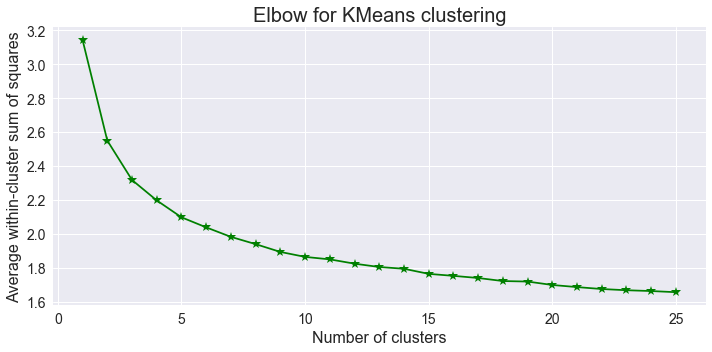

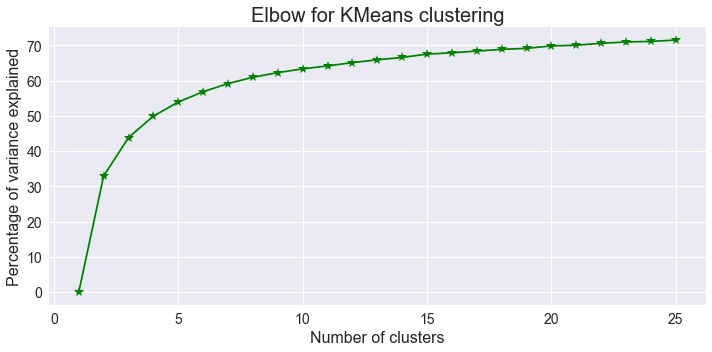

In [52]:
elbow(vals, range(1,26))

Fit 5 clusters

In [53]:

###############################################################################
# Fit K-means algorithm for selected number of clusters (again)


#creating a date range: 2000-2016
timeline = pd.date_range('2000', '2017', freq='A')

nc = 5

km = KMeans(n_clusters=nc, random_state=888)

km.fit(vals)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=888, tol=0.0001, verbose=0)

Cluster centers


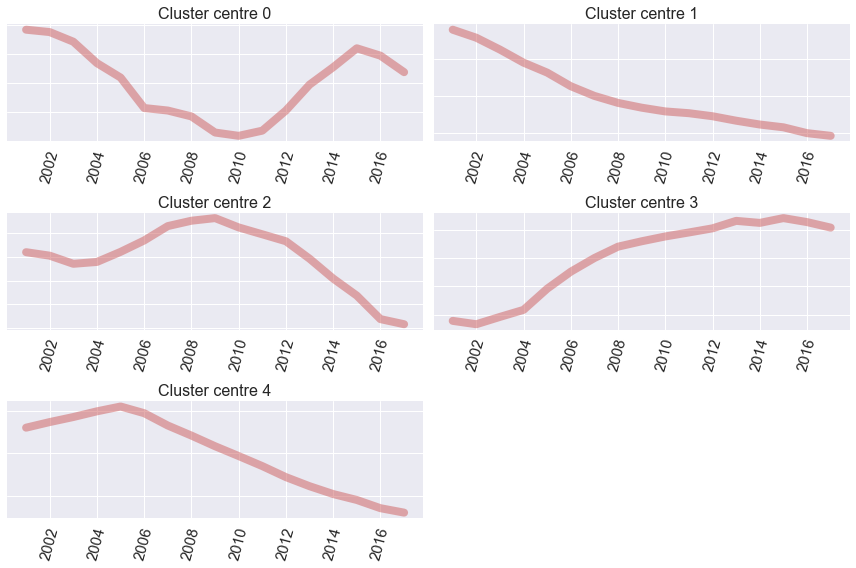

In [54]:
fig = pl.figure(figsize=(12, 8))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(3, 2, (i + 1))
    ax.plot(timeline, Xc, lw = 8, alpha = 0.5, c='IndianRed')
    
    pl.title("Cluster centre %d"%(i), fontsize = 16)
    
    
    pl.xticks(fontsize = 15, rotation=75)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    plt.tight_layout()
print("Cluster centers")

In [55]:
tsBlackEnrolStandard['ClustLabel'] = km.labels_

In [56]:
tsBlackEnrolStandard.columns

Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'popmean', 'stdev', 'ClustLabel'],
      dtype='object')

In [57]:
vals = tsBlackEnrolStandard.drop(['variable', 'popmean', 'stdev'], axis = 1)

In [59]:

for j in range(nc):
    print("Schools in cluster", j)
    print(list(vals.BNLONG[km.labels_ == j]))
    print("\n")

#clustersdf = gp.GeoDataFrame()
#clustersdf['precinct'] = vals.PCT
#clustersdf['cluster'] = km.labels_

Schools in cluster 0
['K011', 'K088', 'K127', 'K131', 'K132', 'K133', 'K152', 'K153', 'K157', 'K169', 'K196', 'K199', 'K229', 'K231', 'K372', 'M034', 'M057', 'M063', 'M072', 'M094', 'M098', 'M169', 'M223', 'M226', 'M250', 'M258', 'M411', 'M468', 'M515', 'Q009', 'Q011', 'Q018', 'Q036', 'Q046', 'Q048', 'Q073', 'Q075', 'Q079', 'Q084', 'Q094', 'Q097', 'Q107', 'Q108', 'Q130', 'Q149', 'Q159', 'Q162', 'Q163', 'Q166', 'Q169', 'Q176', 'Q182', 'Q185', 'Q190', 'Q191', 'Q200', 'Q203', 'Q213', 'Q217', 'Q221', 'Q235', 'Q550', 'R003', 'R005', 'R008', 'R037', 'R046', 'R048', 'R050', 'R055', 'R069', 'R605', 'X004', 'X023', 'X030', 'X037', 'X046', 'X049', 'X054', 'X055', 'X059', 'X062', 'X087', 'X109', 'X121', 'X150', 'X153', 'X157', 'X181', 'X186', 'X204', 'X205', 'X396', 'X495']


Schools in cluster 1
['K001', 'K002', 'K003', 'K005', 'K006', 'K007', 'K008', 'K009', 'K012', 'K013', 'K014', 'K015', 'K016', 'K020', 'K021', 'K023', 'K025', 'K026', 'K028', 'K032', 'K035', 'K036', 'K038', 'K040', 'K044', 'K